In [12]:
import torch
import torchvision.datasets
import torchvision.models
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
import torch.nn as nn
from tqdm import tqdm
from train_utils import get_data_loaders, train, test
from PIL import Image
import pandas as pd

In [13]:
root = './distilled_dataset'

### CIFAR100 Distilled

In [14]:
class CIFAR100_Distilled(Dataset):
    def __init__(self, idx_df, transform):
        self.idx_df = idx_df
        self.transform = transform
    
    def __len__(self):
        return len(self.idx_df)

    def __getitem__(self, index):
        entry = self.idx_df.iloc[index]
        image = self.transform(Image.open(entry.image_path))
        label = entry.label
        return image, torch.tensor(label)

In [15]:
index_file = pd.read_csv('./CIFAR100_DM_index_files/ipc10_idx.csv')
index_file

,image_path,label
0,./CIFAR100_DM/ipc10/apple/a44fbb26-308f-412a-b...,0
1,./CIFAR100_DM/ipc10/apple/adb78c62-a57f-4020-b...,0
2,./CIFAR100_DM/ipc10/apple/ade31746-e045-401f-a...,0
3,./CIFAR100_DM/ipc10/apple/bdde2f5e-0eb7-41ce-b...,0
4,./CIFAR100_DM/ipc10/apple/c1abfe70-0d3e-4080-b...,0
...,...,...
995,./CIFAR100_DM/ipc10/worm/9b7cc26b-8172-4cfc-ac...,99
996,./CIFAR100_DM/ipc10/worm/c5edf177-86a9-42ff-a7...,99
997,./CIFAR100_DM/ipc10/worm/c713f90e-5bf2-44fb-81...,99
998,./CIFAR100_DM/ipc10/worm/d13e2303-0031-4206-9e...,99


In [16]:
image_normalize= transforms.Lambda(lambda img: 2 * img / 255. - 1) # normalize to [-1, 1]
# https://github.com/Lornatang/pytorch-alexnet-cifar100/blob/master/utils/datasets.py
transform = transforms.Compose([
                                transforms.Resize(64),
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor(),
                                # image_normalize,
                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                                # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                              ])
cifar100_distilled_train = CIFAR100_Distilled(index_file, transform)

cifar100_root = '../cifar100'
cifar100_test = torchvision.datasets.CIFAR100(cifar100_root,
                                            train=False,
                                            transform=transforms.Compose([
                                                transforms.Resize(64),
                                                transforms.ToTensor(),
                                                # image_normalize,
                                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                                                # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                              ]))

In [22]:
batch_size = 16 # cut batch size to half for ipc50
train_data_loader, test_data_loader = get_data_loaders(cifar100_distilled_train, cifar100_test, batch_size=batch_size)

In [23]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"[INFO]: Computation device: {device}")

[INFO]: Computation device: cuda


In [24]:
model_name = 'alexnet'
dataset = 'cifar100_distilled'
model_path = f'./model_weight/{dataset}/{model_name}/'
model = torchvision.models.alexnet(num_classes=100).to(device)

In [25]:
train_record, test_record  = train(model, model_path, train_data_loader, test_data_loader, num_epochs=100, optimizer='adam', lr=1e-3)

Epoch 1: 100%|██████████| 63/63 [00:48<00:00,  1.30it/s, loss=4.56]


epoch: 1 done, loss: 0.2914201617240906
Acc: 0.01
[0.001]


Epoch 2: 100%|██████████| 63/63 [00:49<00:00,  1.28it/s, loss=4.3] 


epoch: 2 done, loss: 0.28300800919532776
Acc: 0.0143
[0.001]


Epoch 3: 100%|██████████| 63/63 [00:49<00:00,  1.27it/s, loss=4.23]


epoch: 3 done, loss: 0.2710837125778198
Acc: 0.0126
[0.001]


Epoch 4: 100%|██████████| 63/63 [00:48<00:00,  1.30it/s, loss=4.6] 


epoch: 4 done, loss: 0.26473769545555115
Acc: 0.0135
[0.001]


Epoch 5: 100%|██████████| 63/63 [00:49<00:00,  1.27it/s, loss=4.11]


epoch: 5 done, loss: 0.25889503955841064
Acc: 0.0127
[0.001]


Epoch 6: 100%|██████████| 63/63 [00:48<00:00,  1.30it/s, loss=3.9] 


epoch: 6 done, loss: 0.25726884603500366
Acc: 0.0106
[0.001]


Epoch 7: 100%|██████████| 63/63 [00:48<00:00,  1.29it/s, loss=3.78]


epoch: 7 done, loss: 0.25548627972602844
Acc: 0.0104
[0.001]


Epoch 8: 100%|██████████| 63/63 [00:49<00:00,  1.29it/s, loss=4.13]


epoch: 8 done, loss: 0.25319960713386536
Acc: 0.0145
[0.001]


Epoch 9: 100%|██████████| 63/63 [00:48<00:00,  1.30it/s, loss=4.28]


epoch: 9 done, loss: 0.2514382302761078
Acc: 0.0111
[0.001]


Epoch 10: 100%|██████████| 63/63 [00:47<00:00,  1.32it/s, loss=3.94]


epoch: 10 done, loss: 0.24635963141918182
Acc: 0.0071
[0.001]


Epoch 11: 100%|██████████| 63/63 [00:49<00:00,  1.27it/s, loss=3.99]


epoch: 11 done, loss: 0.24576793611049652
Acc: 0.012
[0.001]


Epoch 12: 100%|██████████| 63/63 [00:48<00:00,  1.29it/s, loss=4.08]


epoch: 12 done, loss: 0.24375075101852417
Acc: 0.0113
[0.001]


Epoch 13: 100%|██████████| 63/63 [00:48<00:00,  1.29it/s, loss=4.07]


epoch: 13 done, loss: 0.24634885787963867
Acc: 0.0142
[0.001]


Epoch 14: 100%|██████████| 63/63 [00:49<00:00,  1.27it/s, loss=3.88]


epoch: 14 done, loss: 0.24328960478305817
Acc: 0.0098
[0.001]


Epoch 15: 100%|██████████| 63/63 [00:49<00:00,  1.28it/s, loss=3.61]


epoch: 15 done, loss: 0.24453839659690857
Acc: 0.0147
[0.001]


Epoch 16: 100%|██████████| 63/63 [00:49<00:00,  1.28it/s, loss=3.56]


epoch: 16 done, loss: 0.24306537210941315
Acc: 0.0153
[0.001]


Epoch 17: 100%|██████████| 63/63 [00:48<00:00,  1.31it/s, loss=3.55]


epoch: 17 done, loss: 0.24105794727802277
Acc: 0.0151
[0.001]


Epoch 18: 100%|██████████| 63/63 [00:49<00:00,  1.27it/s, loss=3.86]


epoch: 18 done, loss: 0.2420407384634018
Acc: 0.012
[0.001]


Epoch 19: 100%|██████████| 63/63 [00:48<00:00,  1.30it/s, loss=4.29]


epoch: 19 done, loss: 0.24152445793151855
Acc: 0.0127
[0.001]


Epoch 20: 100%|██████████| 63/63 [00:49<00:00,  1.27it/s, loss=3.89]


epoch: 20 done, loss: 0.24257825314998627
Acc: 0.0141
[0.001]


Epoch 21: 100%|██████████| 63/63 [00:49<00:00,  1.28it/s, loss=4.08]


epoch: 21 done, loss: 0.23899689316749573
Acc: 0.0146
[0.001]


Epoch 22: 100%|██████████| 63/63 [00:49<00:00,  1.28it/s, loss=4.25]


epoch: 22 done, loss: 0.2378816306591034
Acc: 0.0129
[0.001]


Epoch 23: 100%|██████████| 63/63 [00:47<00:00,  1.34it/s, loss=3.77]


epoch: 23 done, loss: 0.23755811154842377
Acc: 0.0143
[0.001]


Epoch 24: 100%|██████████| 63/63 [00:49<00:00,  1.28it/s, loss=3.66]


epoch: 24 done, loss: 0.23618058860301971
Acc: 0.0145
[0.001]


Epoch 25: 100%|██████████| 63/63 [00:48<00:00,  1.31it/s, loss=4.05]


epoch: 25 done, loss: 0.23652110993862152
Acc: 0.0143
[0.001]


Epoch 26: 100%|██████████| 63/63 [00:49<00:00,  1.28it/s, loss=3.91]


epoch: 26 done, loss: 0.2370661050081253
Acc: 0.0128
[0.001]


Epoch 27: 100%|██████████| 63/63 [00:49<00:00,  1.28it/s, loss=3.66]


epoch: 27 done, loss: 0.23649194836616516
Acc: 0.0153
[0.001]


Epoch 28: 100%|██████████| 63/63 [00:49<00:00,  1.29it/s, loss=3.72]


epoch: 28 done, loss: 0.23400916159152985
Acc: 0.0158
[0.001]


Epoch 29: 100%|██████████| 63/63 [00:48<00:00,  1.29it/s, loss=3.75]


epoch: 29 done, loss: 0.2358955442905426
Acc: 0.0102
[0.001]


Epoch 30: 100%|██████████| 63/63 [00:49<00:00,  1.29it/s, loss=3.18]


epoch: 30 done, loss: 0.23190172016620636
Acc: 0.0126
[0.001]


Epoch 31: 100%|██████████| 63/63 [00:48<00:00,  1.29it/s, loss=3.81]


epoch: 31 done, loss: 0.23661911487579346
Acc: 0.0142
[0.001]


Epoch 32: 100%|██████████| 63/63 [00:48<00:00,  1.31it/s, loss=3.92]


epoch: 32 done, loss: 0.230752095580101
Acc: 0.0119
[0.001]


Epoch 33: 100%|██████████| 63/63 [00:49<00:00,  1.29it/s, loss=3.72]


epoch: 33 done, loss: 0.23281800746917725
Acc: 0.0147
[0.001]


Epoch 34: 100%|██████████| 63/63 [00:49<00:00,  1.28it/s, loss=3.61]


epoch: 34 done, loss: 0.23163442313671112
Acc: 0.011
[0.001]


Epoch 35: 100%|██████████| 63/63 [00:49<00:00,  1.28it/s, loss=3.47]


epoch: 35 done, loss: 0.22902043163776398
Acc: 0.009
[0.001]


Epoch 36: 100%|██████████| 63/63 [00:48<00:00,  1.31it/s, loss=3.72]


epoch: 36 done, loss: 0.2308921068906784
Acc: 0.0157
[0.001]


Epoch 37: 100%|██████████| 63/63 [00:49<00:00,  1.29it/s, loss=3.71]


epoch: 37 done, loss: 0.2360832393169403
Acc: 0.0117
[0.001]


Epoch 38: 100%|██████████| 63/63 [00:49<00:00,  1.27it/s, loss=3.98]


epoch: 38 done, loss: 0.22876057028770447
Acc: 0.0116
[0.001]


Epoch 39: 100%|██████████| 63/63 [00:49<00:00,  1.28it/s, loss=3.55]


epoch: 39 done, loss: 0.2267473042011261
Acc: 0.0134
[0.001]


Epoch 40: 100%|██████████| 63/63 [00:47<00:00,  1.33it/s, loss=3.33]


epoch: 40 done, loss: 0.22744005918502808
Acc: 0.0133
[0.001]


Epoch 41: 100%|██████████| 63/63 [00:49<00:00,  1.27it/s, loss=3.95]


epoch: 41 done, loss: 0.22638432681560516
Acc: 0.0134
[0.001]


Epoch 42: 100%|██████████| 63/63 [00:48<00:00,  1.31it/s, loss=3.08]


epoch: 42 done, loss: 0.2298828661441803
Acc: 0.0129
[0.001]


Epoch 43: 100%|██████████| 63/63 [00:49<00:00,  1.29it/s, loss=3.45]


epoch: 43 done, loss: 0.2278689593076706
Acc: 0.0138
[0.001]


Epoch 44: 100%|██████████| 63/63 [00:48<00:00,  1.29it/s, loss=3.75]


epoch: 44 done, loss: 0.22777672111988068
Acc: 0.0147
[0.001]


Epoch 45: 100%|██████████| 63/63 [00:47<00:00,  1.32it/s, loss=4.19]


epoch: 45 done, loss: 0.22448918223381042
Acc: 0.0096
[0.001]


Epoch 46: 100%|██████████| 63/63 [00:48<00:00,  1.29it/s, loss=4.25]


epoch: 46 done, loss: 0.2261078655719757
Acc: 0.0135
[0.001]


Epoch 47: 100%|██████████| 63/63 [00:48<00:00,  1.29it/s, loss=3.54]


epoch: 47 done, loss: 0.2302003651857376
Acc: 0.0147
[0.001]


Epoch 48: 100%|██████████| 63/63 [00:47<00:00,  1.32it/s, loss=3.76]


epoch: 48 done, loss: 0.22330059111118317
Acc: 0.014
[0.001]


Epoch 49: 100%|██████████| 63/63 [00:48<00:00,  1.29it/s, loss=3.58]


epoch: 49 done, loss: 0.22697167098522186
Acc: 0.0123
[0.001]


Epoch 50: 100%|██████████| 63/63 [00:48<00:00,  1.29it/s, loss=3.42]


epoch: 50 done, loss: 0.22399388253688812
Acc: 0.0152
[0.001]


Epoch 51: 100%|██████████| 63/63 [00:48<00:00,  1.29it/s, loss=3.59]


epoch: 51 done, loss: 0.2294011265039444
Acc: 0.0111
[0.001]


Epoch 52: 100%|██████████| 63/63 [00:49<00:00,  1.26it/s, loss=3.34]


epoch: 52 done, loss: 0.2235340178012848
Acc: 0.0141
[0.0001]


Epoch 53: 100%|██████████| 63/63 [00:48<00:00,  1.29it/s, loss=3.4] 


epoch: 53 done, loss: 0.21384328603744507
Acc: 0.0134
[0.0001]


Epoch 54: 100%|██████████| 63/63 [00:47<00:00,  1.32it/s, loss=4.09]


epoch: 54 done, loss: 0.21058732271194458
Acc: 0.014
[0.0001]


Epoch 55: 100%|██████████| 63/63 [00:48<00:00,  1.30it/s, loss=2.84]


epoch: 55 done, loss: 0.20832940936088562
Acc: 0.0136
[0.0001]


Epoch 56: 100%|██████████| 63/63 [00:48<00:00,  1.29it/s, loss=3.25]


epoch: 56 done, loss: 0.2084035873413086
Acc: 0.0136
[0.0001]


Epoch 57: 100%|██████████| 63/63 [00:49<00:00,  1.28it/s, loss=3.54]


epoch: 57 done, loss: 0.2079281359910965
Acc: 0.0135
[0.0001]


Epoch 58: 100%|██████████| 63/63 [00:48<00:00,  1.29it/s, loss=3.32]


epoch: 58 done, loss: 0.20650245249271393
Acc: 0.0146
[0.0001]


Epoch 59: 100%|██████████| 63/63 [00:54<00:00,  1.16it/s, loss=3.5] 


epoch: 59 done, loss: 0.20645982027053833
Acc: 0.0127
[0.0001]


Epoch 60: 100%|██████████| 63/63 [05:54<00:00,  5.63s/it, loss=3.39]


epoch: 60 done, loss: 0.20347191393375397
Acc: 0.0157
[0.0001]


Epoch 61: 100%|██████████| 63/63 [3:47:26<00:00, 216.61s/it, loss=2.92]    


epoch: 61 done, loss: 0.2033441662788391
Acc: 0.0133
[0.0001]


Epoch 62: 100%|██████████| 63/63 [00:01<00:00, 58.97it/s, loss=3.24]


epoch: 62 done, loss: 0.20235773921012878
Acc: 0.0133
[0.0001]


Epoch 63: 100%|██████████| 63/63 [00:01<00:00, 55.57it/s, loss=2.83]


epoch: 63 done, loss: 0.20175398886203766
Acc: 0.0147
[0.0001]


Epoch 64: 100%|██████████| 63/63 [00:01<00:00, 57.46it/s, loss=2.86]


epoch: 64 done, loss: 0.20265936851501465
Acc: 0.0132
[0.0001]


Epoch 65: 100%|██████████| 63/63 [00:01<00:00, 59.02it/s, loss=3.15]


epoch: 65 done, loss: 0.20174767076969147
Acc: 0.014
[0.0001]


Epoch 66: 100%|██████████| 63/63 [00:01<00:00, 55.01it/s, loss=3.04]


epoch: 66 done, loss: 0.20082330703735352
Acc: 0.014
[0.0001]


Epoch 67: 100%|██████████| 63/63 [00:01<00:00, 54.54it/s, loss=3.22]


epoch: 67 done, loss: 0.19955934584140778
Acc: 0.0135
[0.0001]


Epoch 68: 100%|██████████| 63/63 [00:01<00:00, 55.27it/s, loss=3.46]


epoch: 68 done, loss: 0.19857379794120789
Acc: 0.0145
[0.0001]


Epoch 69: 100%|██████████| 63/63 [00:01<00:00, 56.77it/s, loss=3.06]


epoch: 69 done, loss: 0.19745475053787231
Acc: 0.0149
[0.0001]


Epoch 70: 100%|██████████| 63/63 [00:01<00:00, 55.99it/s, loss=2.81]


epoch: 70 done, loss: 0.19758470356464386
Acc: 0.0147
[0.0001]


Epoch 71: 100%|██████████| 63/63 [00:01<00:00, 61.36it/s, loss=3.46]


epoch: 71 done, loss: 0.19656233489513397
Acc: 0.0141
[0.0001]


Epoch 72: 100%|██████████| 63/63 [00:01<00:00, 57.68it/s, loss=2.85]


epoch: 72 done, loss: 0.19549058377742767
Acc: 0.0141
[0.0001]


Epoch 73: 100%|██████████| 63/63 [00:01<00:00, 58.10it/s, loss=3.47]


epoch: 73 done, loss: 0.19641588628292084
Acc: 0.0139
[0.0001]


Epoch 74: 100%|██████████| 63/63 [00:01<00:00, 59.23it/s, loss=3.36]


epoch: 74 done, loss: 0.19633863866329193
Acc: 0.0149
[0.0001]


Epoch 75: 100%|██████████| 63/63 [00:01<00:00, 57.25it/s, loss=2.95]


epoch: 75 done, loss: 0.19551873207092285
Acc: 0.0144
[0.0001]


Epoch 76: 100%|██████████| 63/63 [00:01<00:00, 60.60it/s, loss=2.91]


epoch: 76 done, loss: 0.19610238075256348
Acc: 0.015
[1e-05]


Epoch 77: 100%|██████████| 63/63 [00:01<00:00, 58.56it/s, loss=2.86]


epoch: 77 done, loss: 0.19159014523029327
Acc: 0.0136
[1e-05]


Epoch 78: 100%|██████████| 63/63 [00:01<00:00, 59.47it/s, loss=3.01]


epoch: 78 done, loss: 0.19196780025959015
Acc: 0.0143
[1e-05]


Epoch 79: 100%|██████████| 63/63 [00:01<00:00, 60.47it/s, loss=2.64]


epoch: 79 done, loss: 0.18934938311576843
Acc: 0.0136
[1e-05]


Epoch 80: 100%|██████████| 63/63 [00:01<00:00, 59.37it/s, loss=3.45]


epoch: 80 done, loss: 0.19189704954624176
Acc: 0.0142
[1e-05]


Epoch 81: 100%|██████████| 63/63 [00:01<00:00, 59.44it/s, loss=3.2] 


epoch: 81 done, loss: 0.1911298930644989
Acc: 0.0144
[1e-05]


Epoch 82: 100%|██████████| 63/63 [00:01<00:00, 57.65it/s, loss=3.3] 


epoch: 82 done, loss: 0.19172319769859314
Acc: 0.0143
[1e-05]


Epoch 83: 100%|██████████| 63/63 [00:01<00:00, 58.98it/s, loss=2.96]


epoch: 83 done, loss: 0.1910102516412735
Acc: 0.0144
[1.0000000000000002e-06]


Epoch 84: 100%|██████████| 63/63 [00:01<00:00, 59.26it/s, loss=2.84]


epoch: 84 done, loss: 0.19175125658512115
Acc: 0.0144
[1.0000000000000002e-06]


Epoch 85: 100%|██████████| 63/63 [00:01<00:00, 60.02it/s, loss=3.01]


epoch: 85 done, loss: 0.1911362111568451
Acc: 0.0144
[1.0000000000000002e-06]


Epoch 86: 100%|██████████| 63/63 [00:01<00:00, 54.98it/s, loss=2.58]


epoch: 86 done, loss: 0.19053031504154205
Acc: 0.0143
[1.0000000000000002e-06]


Epoch 87: 100%|██████████| 63/63 [00:01<00:00, 58.27it/s, loss=3.12]


epoch: 87 done, loss: 0.19009412825107574
Acc: 0.0138
[1.0000000000000002e-06]


Epoch 88: 100%|██████████| 63/63 [00:01<00:00, 55.86it/s, loss=3.14]


epoch: 88 done, loss: 0.18995027244091034
Acc: 0.0139
[1.0000000000000002e-06]


Epoch 89: 100%|██████████| 63/63 [00:01<00:00, 59.28it/s, loss=2.95]


epoch: 89 done, loss: 0.1901516318321228
Acc: 0.014
[1.0000000000000002e-06]


Epoch 90: 100%|██████████| 63/63 [00:01<00:00, 58.95it/s, loss=3.11]


epoch: 90 done, loss: 0.19153183698654175
Acc: 0.0139
[1.0000000000000002e-06]


Epoch 91: 100%|██████████| 63/63 [00:01<00:00, 59.91it/s, loss=2.99]


epoch: 91 done, loss: 0.18982228636741638
Acc: 0.0139
[1.0000000000000002e-06]


Epoch 92: 100%|██████████| 63/63 [00:01<00:00, 59.62it/s, loss=3.2] 


epoch: 92 done, loss: 0.19110107421875
Acc: 0.014
[1.0000000000000002e-06]


Epoch 93: 100%|██████████| 63/63 [00:01<00:00, 59.82it/s, loss=3.07]


epoch: 93 done, loss: 0.1919194459915161
Acc: 0.0138
[1.0000000000000002e-06]


Epoch 94: 100%|██████████| 63/63 [00:01<00:00, 56.02it/s, loss=2.72]


epoch: 94 done, loss: 0.19030646979808807
Acc: 0.0138
[1.0000000000000002e-06]


Epoch 95: 100%|██████████| 63/63 [00:01<00:00, 57.31it/s, loss=2.82]


epoch: 95 done, loss: 0.1906469315290451
Acc: 0.014
[1.0000000000000002e-06]


Epoch 96: 100%|██████████| 63/63 [00:01<00:00, 58.52it/s, loss=3.17]


epoch: 96 done, loss: 0.19105897843837738
Acc: 0.0139
[1.0000000000000002e-06]


Epoch 97: 100%|██████████| 63/63 [00:01<00:00, 57.14it/s, loss=2.71]


epoch: 97 done, loss: 0.1904149204492569
Acc: 0.0139
[1.0000000000000002e-06]


Epoch 98: 100%|██████████| 63/63 [00:01<00:00, 60.13it/s, loss=2.92]


epoch: 98 done, loss: 0.19066859781742096
Acc: 0.014
[1.0000000000000002e-06]


Epoch 99: 100%|██████████| 63/63 [00:01<00:00, 58.30it/s, loss=2.88]


epoch: 99 done, loss: 0.1918201744556427
Acc: 0.0141
[1.0000000000000002e-06]


Epoch 100: 100%|██████████| 63/63 [00:01<00:00, 58.45it/s, loss=3.41]


epoch: 100 done, loss: 0.1918713003396988
Acc: 0.0142
[1.0000000000000002e-06]
Time taken: 18368.399486 seconds


In [26]:
test(model, f'{model_path}/model.bin', test_data_loader, criterion=nn.CrossEntropyLoss()) #best_acc, test_loss

(0.0158, tensor(0.3750, device='cuda:0'))

<AxesSubplot: >

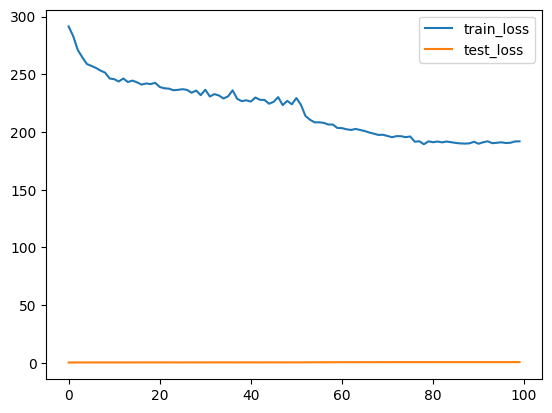

In [27]:
import pandas as pd
results = pd.DataFrame([])
results['train_loss']  = train_record
results['test_loss']  = test_record
results.plot.line(y=['train_loss', 'test_loss'])